In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np
import pytz
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
plt.style.use('_mpl-gallery')

In [10]:
# Kilburn Group

klbParticipants = [30,31,32,33] 
startCoordination = datetime.datetime(2023,10,18,0,0,0,0,tzinfo=pytz.timezone('UTC'))

# Define the time range for nighttime shading - 7pm to 5am
nighttime_start = 17
nighttime_end = 8

bookings = pd.read_json("../../chatbot_data/bookings/bookings13-11-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True)
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True)
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True)

klbBookings = bookings.loc[bookings['user'].isin(klbParticipants)] 
klbBookings = klbBookings.loc[klbBookings['start']>= startCoordination ] 
klbBookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
127,2023-10-20 11:00:00+00:00,5400,laundry,None,yes,0.474828,32,electricity_consumption,30,2023-10-19 22:06:27.897000+00:00,2023-10-19 22:06:27.897000+00:00
129,2023-10-20 10:00:00+00:00,4800,laundry,None,yes,0.360819,23,electricity_consumption,32,2023-10-20 08:54:59.036000+00:00,2023-10-20 08:54:59.036000+00:00
131,2023-10-20 16:00:00+00:00,3600,oven,None,yes,0.488376,32,electricity_consumption,30,2023-10-20 11:03:48.386000+00:00,2023-10-20 11:03:48.386000+00:00
134,2023-10-20 17:00:00+00:00,3600,dishwasher,None,yes,0.461472,23,electricity_consumption,32,2023-10-20 16:54:07.331000+00:00,2023-10-20 16:54:07.331000+00:00
139,2023-10-21 10:00:00+00:00,3600,laundry,None,yes,0.270614,23,electricity_consumption,32,2023-10-21 09:30:04.462000+00:00,2023-10-21 09:30:04.462000+00:00
...,...,...,...,...,...,...,...,...,...,...,...
260,2023-11-08 13:00:00+00:00,7200,laundry,,no,1.320000,31,electricity_consumption,31,2023-11-08 12:37:19.011000+00:00,2023-11-08 12:37:19.011000+00:00
261,2023-11-09 09:00:00+00:00,3600,hob,,yes,0.350000,32,electricity_consumption,30,2023-11-08 17:39:59.735000+00:00,2023-11-08 17:39:59.735000+00:00
262,2023-11-08 19:45:00+00:00,3600,dishwasher,Don’t want to do it too late,somewhat,0.460000,23,electricity_consumption,32,2023-11-08 19:33:53.589000+00:00,2023-11-08 19:33:53.589000+00:00
263,2023-11-09 08:00:00+00:00,3600,dishwasher,,no,0.450000,31,electricity_consumption,31,2023-11-09 07:54:20.373000+00:00,2023-11-09 07:54:20.373000+00:00


In [11]:
# klb_group_consumption = pd.read_json("../../chatbot_data/consumption/group_kilburn/all_group.json")
consumption113Sara = pd.read_json("../../chatbot_data/consumption/group_kilburn/sensor_113_sara.json")
consumption103Adam = pd.read_json("../../chatbot_data/consumption/group_kilburn/sensor_103_adam.json")
# consumption100Ute = pd.read_json("../../chatbot_data/consumption/group_kilburn/sensor_100_ute.json")
consumption112Dannie = pd.read_json("../../chatbot_data/consumption/group_kilburn/sensor_112_dannie.json")

# klb_group_consumption = g1_group_consumption["readings"][0]
consumption113Sara = consumption113Sara["readings"][0]
consumption103Adam = consumption103Adam["readings"][0]
# consumption100Ute = consumption100Ute["readings"][0]
consumption112Dannie = consumption112Dannie["readings"][0]

# klb_group_consumption = pd.DataFrame.from_dict(klb_group_consumption, orient='columns')
consumption113Sara = pd.DataFrame.from_dict(consumption113Sara, orient='columns')
consumption103Adam = pd.DataFrame.from_dict(consumption103Adam, orient='columns')
# consumption100Ute = pd.DataFrame.from_dict(consumption100Ute, orient='columns')
consumption112Dannie = pd.DataFrame.from_dict(consumption112Dannie, orient='columns')

# klb_group_consumption['time'] = pd.to_datetime(klb_group_consumption['time'],infer_datetime_format=True)
consumption113Sara['time'] = pd.to_datetime(consumption113Sara['time'],infer_datetime_format=True)
consumption103Adam['time'] = pd.to_datetime(consumption103Adam['time'],infer_datetime_format=True)
# consumption100Ute['time'] = pd.to_datetime(consumption100Ute['time'],infer_datetime_format=True)
consumption112Dannie['time'] = pd.to_datetime(consumption112Dannie['time'],infer_datetime_format=True)

# klb_group_consumption['value'] = klb_group_consumption['value']*0.23*0.64*0.9
consumption113Sara['value'] = consumption113Sara['value']*0.23*0.64*0.9
consumption103Adam['value'] = consumption103Adam['value']*0.23*0.64*0.9
# consumption100Ute['value'] = consumption100Ute['value']*0.23*0.64*0.9
consumption112Dannie['value'] = consumption112Dannie['value']*0.23*0.64*0.9

# klb_group_consumption_coordination = klb_group_consumption[ klb_group_consumption['time'] > startCoordination ]
consumption113Sara_coordination = consumption113Sara[ consumption113Sara['time'] > startCoordination ]
consumption103Adam_coordination = consumption103Adam[ consumption103Adam['time'] > startCoordination ]
# consumption100Ute_coordination = consumption100Ute[ consumption100Ute['time'] > startCoordination ]
consumption112Dannie_coordination = consumption112Dannie[ consumption112Dannie['time'] > startCoordination ]


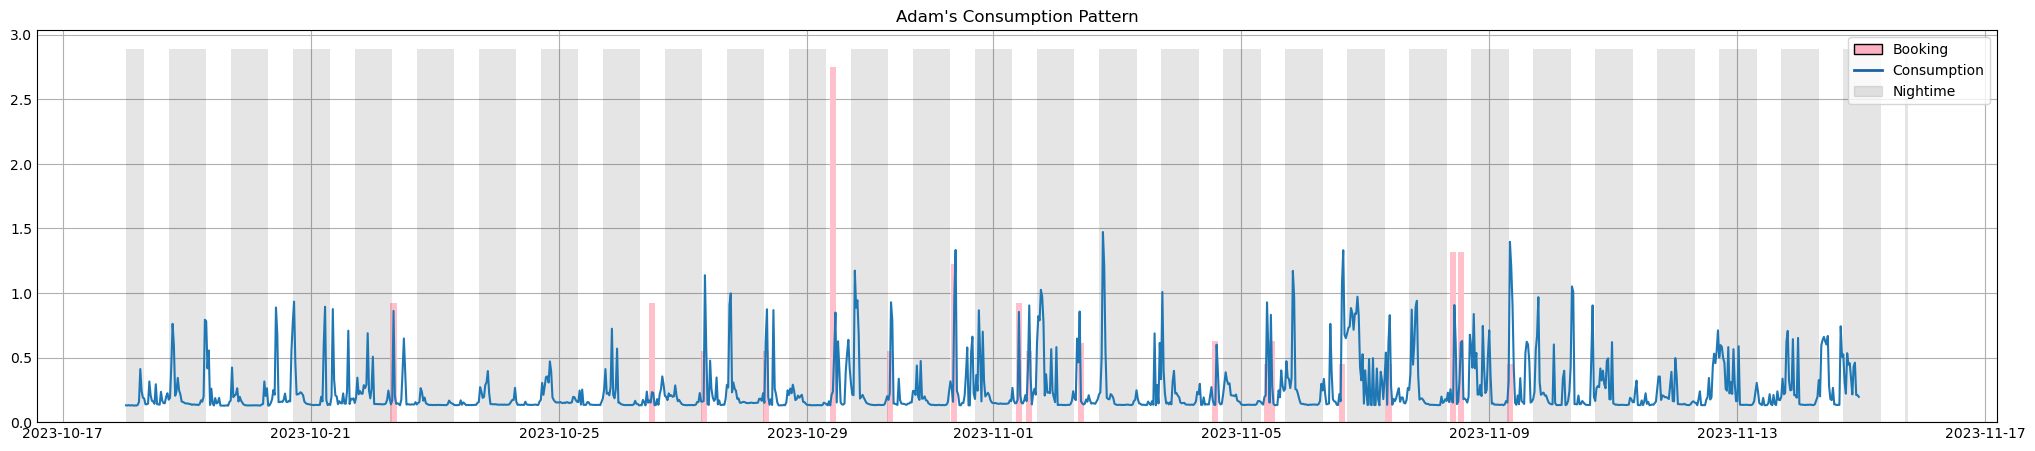

In [12]:
bookings103Adam = klbBookings.loc[klbBookings['user']==31]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings103Adam['start'],bookings103Adam['consumption'],color='pink',width=0.1)
ax.plot(consumption103Adam_coordination['time'],consumption103Adam_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumption103Adam_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumption103Adam_coordination['time'].dt.hour >= nighttime_start) |
                       (consumption103Adam_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)

ax.set_title("Adam's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('adam_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

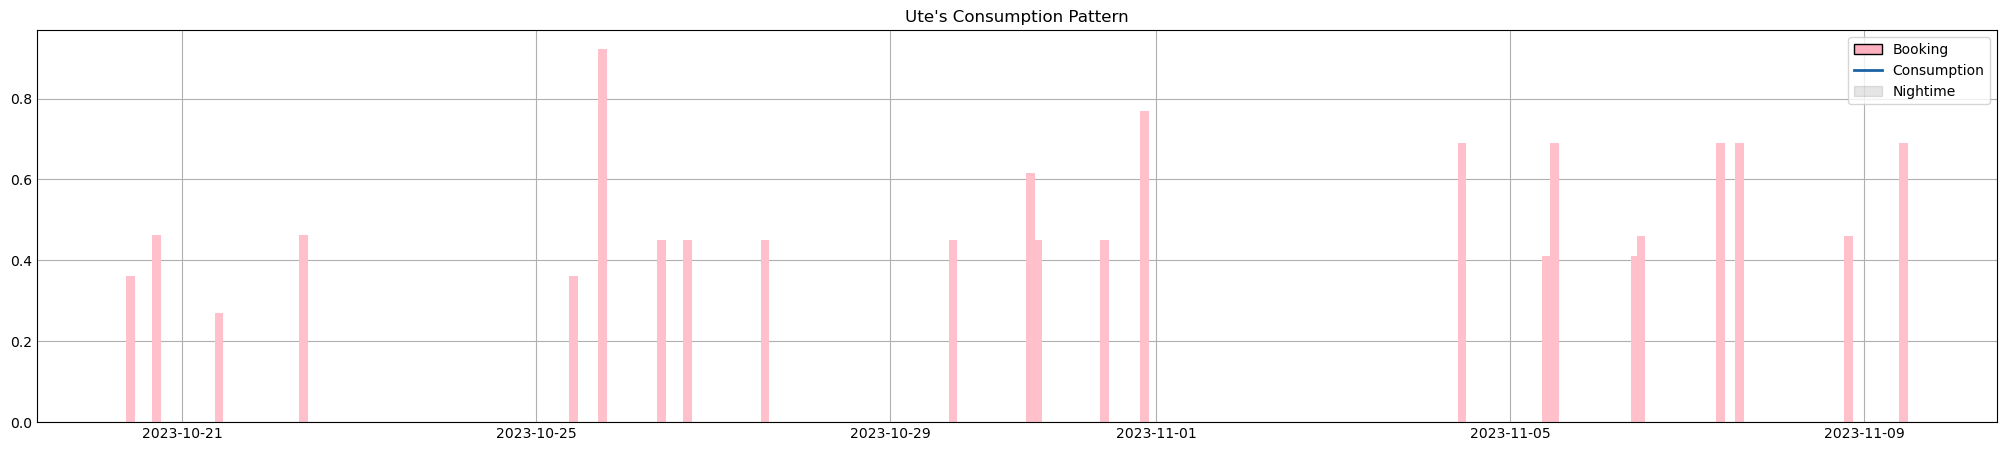

In [13]:
bookings100Ute = klbBookings.loc[klbBookings['user']==32]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings100Ute['start'],bookings100Ute['consumption'],color='pink',width=0.1)
# ax.plot(consumption100Ute_coordination['time'],consumption100Ute_coordination['value'])

# Fill the background to represent nighttime
# ax.fill_between(consumption100Ute_coordination['time'], ax.get_ylim()[0],
#                 ax.get_ylim()[1],
#                 where=((consumption100Ute_coordination['time'].dt.hour >= nighttime_start) |
#                        (consumption100Ute_coordination['time'].dt.hour < nighttime_end)),
#                 facecolor="#000000", alpha=0.1)

ax.set_title("Ute's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('ute_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

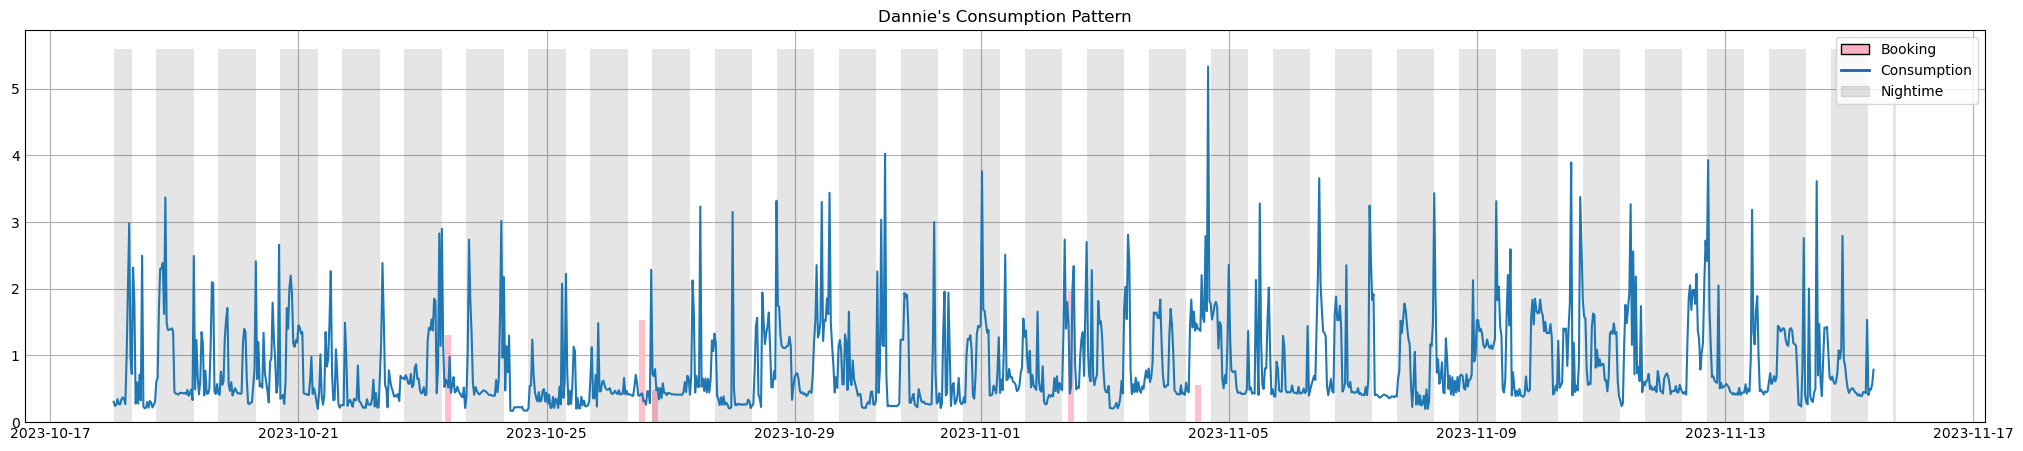

In [14]:
bookings112Dannie = klbBookings.loc[klbBookings['user']==33]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings112Dannie['start'],bookings112Dannie['consumption'],color='pink',width=0.1)
ax.plot(consumption112Dannie_coordination['time'],consumption112Dannie_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumption112Dannie_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumption112Dannie_coordination['time'].dt.hour >= nighttime_start) |
                       (consumption112Dannie_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)

ax.set_title("Dannie's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('dannie_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

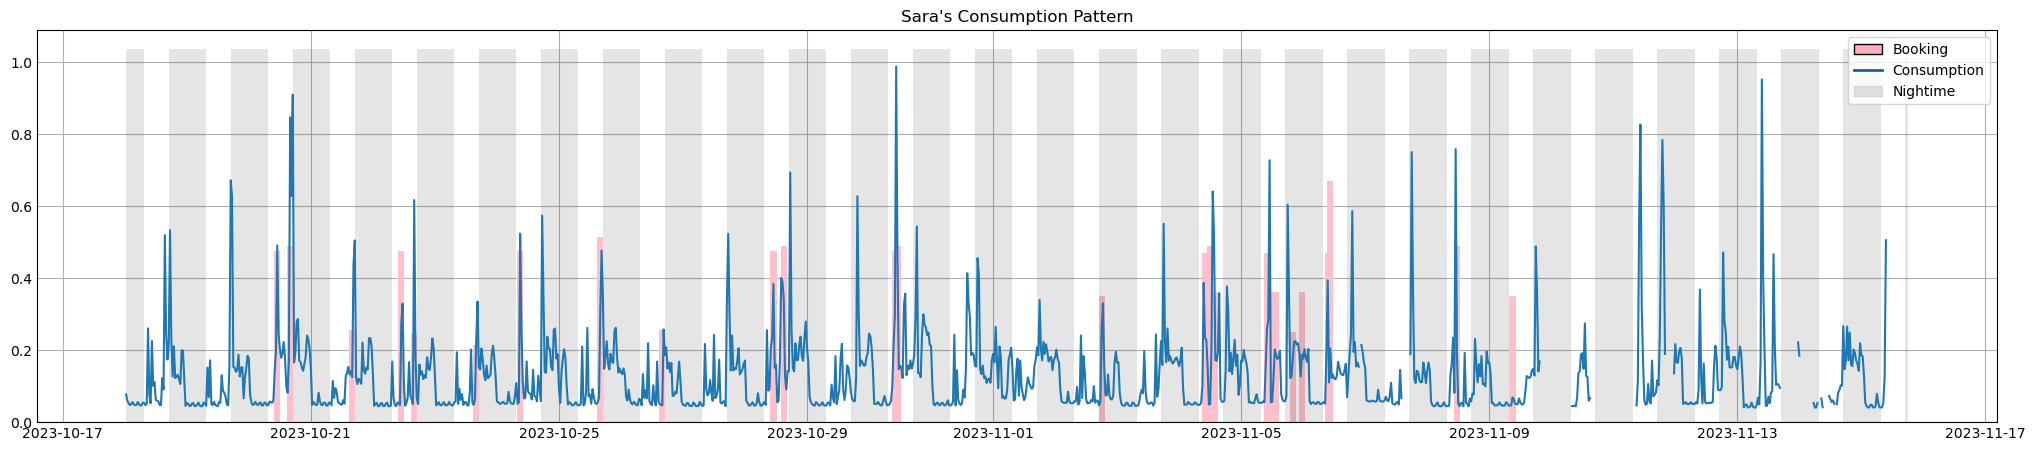

In [15]:
bookings113Sara = klbBookings.loc[klbBookings['user']==30]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings113Sara['start'],bookings113Sara['consumption'],color='pink',width=0.1)
ax.plot(consumption113Sara_coordination['time'],consumption113Sara_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumption113Sara_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumption113Sara_coordination['time'].dt.hour >= nighttime_start) |
                       (consumption113Sara_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)

ax.set_title("Sara's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('sara_consumption.png', dpi=300, bbox_inches='tight')
plt.show()